# Scraping data from Yahoo finance

In [51]:
# Libraries to scrape data
from lxml import html  
import requests
from time import sleep
import json
from collections import OrderedDict
from time import sleep

import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')

#Disable request warnings while parsing
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [2]:
with open('Data/BSE-companies.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    ids = []
    for row in readCSV:
        id_s = str(row[1])
        
        ids.append(id_s) 

In [3]:
failed_tickers = []

def parse(ticker):
    url = "http://finance.yahoo.com/quote/%s?p=%s"%(ticker,ticker)
    response = requests.get(url, verify=False)
    print ("Parsing %s"%(url))
    sleep(4)
    parser = html.fromstring(response.text)
    summary_table = parser.xpath('//div[contains(@data-test,"summary-table")]//tr')
    summary_data = OrderedDict()
    other_details_json_link = "https://query2.finance.yahoo.com/v10/finance/quoteSummary/{0}?formatted=true&lang=en-US&region=US&modules=summaryProfile%2CfinancialData%2CrecommendationTrend%2CupgradeDowngradeHistory%2Cearnings%2CdefaultKeyStatistics%2CcalendarEvents&corsDomain=finance.yahoo.com".format(ticker)
    summary_json_response = requests.get(other_details_json_link)
    try:
    #if True:
        json_loaded_summary =  json.loads(summary_json_response.text)
        y_Target_Est = json_loaded_summary["quoteSummary"]["result"][0]["financialData"]["targetMeanPrice"]['raw']
        earnings_list = json_loaded_summary["quoteSummary"]["result"][0]["calendarEvents"]['earnings']
        eps = json_loaded_summary["quoteSummary"]["result"][0]["defaultKeyStatistics"]["trailingEps"]['raw']
        datelist = []
        for i in earnings_list['earningsDate']:
            datelist.append(i['fmt'])
        earnings_date = ' to '.join(datelist)
        for table_data in summary_table:
            raw_table_key = table_data.xpath('.//td[contains(@class,"C(black)")]//text()')
            raw_table_value = table_data.xpath('.//td[contains(@class,"Ta(end)")]//text()')
            table_key = ''.join(raw_table_key).strip()
            table_value = ''.join(raw_table_value).strip()
            summary_data.update({table_key:table_value})
        summary_data.update({'1y Target Est':y_Target_Est,'EPS (TTM)':eps,'Earnings Date':earnings_date,'ticker':ticker,'url':url})
        return summary_data
    except:
        print ("Failed to parse json response")
        failed_tickers.append(ticker)
        return {"error":"Failed to parse json response"}

In [4]:
finance_data = pd.DataFrame()

for id_s in ids:
    ticker = id_s + ".BO"
    #print ("Fetching data for %s"%(ticker))
    scraped_data = parse(ticker)
    data_dumped = json.dumps(scraped_data)
    data = json.loads(data_dumped)
    
    df = pd.DataFrame.from_dict(data, orient = 'index')
    #print(df)
    finance_data = pd.concat([finance_data,df], axis=1, ignore_index = True)
    
print("Completed successfully")

Parsing http://finance.yahoo.com/quote/ABB.BO?p=ABB.BO
Parsing http://finance.yahoo.com/quote/AEGISLOG.BO?p=AEGISLOG.BO
Parsing http://finance.yahoo.com/quote/AMARAJABAT.BO?p=AMARAJABAT.BO
Parsing http://finance.yahoo.com/quote/AMBALALSA.BO?p=AMBALALSA.BO
Failed to parse json response


C:\Users\sukum\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


Parsing http://finance.yahoo.com/quote/HDFC.BO?p=HDFC.BO
Parsing http://finance.yahoo.com/quote/ANDHRAPET.BO?p=ANDHRAPET.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/ANSALAPI.BO?p=ANSALAPI.BO
Parsing http://finance.yahoo.com/quote/APPLEFIN.BO?p=APPLEFIN.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/ARUNAHTEL.BO?p=ARUNAHTEL.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/BOMDYEING.BO?p=BOMDYEING.BO
Parsing http://finance.yahoo.com/quote/ASIANHOTNR.BO?p=ASIANHOTNR.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/ASSAMCO.BO?p=ASSAMCO.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/ATUL.BO?p=ATUL.BO
Parsing http://finance.yahoo.com/quote/ATVPR.BO?p=ATVPR.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/AUTOLITIND.BO?p=AUTOLITIND.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/BAJAJELEC.BO?p=BAJAJELEC.BO
Parsing http://fin

Parsing http://finance.yahoo.com/quote/IONEXCHANG.BO?p=IONEXCHANG.BO
Parsing http://finance.yahoo.com/quote/ATFL.BO?p=ATFL.BO
Parsing http://finance.yahoo.com/quote/JISLJALEQS.BO?p=JISLJALEQS.BO
Parsing http://finance.yahoo.com/quote/JASCH.BO?p=JASCH.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/JCTLTD.BO?p=JCTLTD.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/JINDALPOLY.BO?p=JINDALPOLY.BO
Parsing http://finance.yahoo.com/quote/JSWSTEEL.BO?p=JSWSTEEL.BO
Parsing http://finance.yahoo.com/quote/UMANGDAIR.BO?p=UMANGDAIR.BO
Parsing http://finance.yahoo.com/quote/KAJARIACER.BO?p=KAJARIACER.BO
Parsing http://finance.yahoo.com/quote/KAKATCEM.BO?p=KAKATCEM.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/KSL.BO?p=KSL.BO
Parsing http://finance.yahoo.com/quote/WHIRLPOOL.BO?p=WHIRLPOOL.BO
Parsing http://finance.yahoo.com/quote/KGDENIM.BO?p=KGDENIM.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/KINETI

Parsing http://finance.yahoo.com/quote/TORNTPHARM.BO?p=TORNTPHARM.BO
Parsing http://finance.yahoo.com/quote/TPINDIA.BO?p=TPINDIA.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/TRANSCHEM.BO?p=TRANSCHEM.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/AMBUJACEM.BO?p=AMBUJACEM.BO
Parsing http://finance.yahoo.com/quote/UTLINDS.BO?p=UTLINDS.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/UNIPHOS.BO?p=UNIPHOS.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/VHL.BO?p=VHL.BO
Parsing http://finance.yahoo.com/quote/HINDALCO.BO?p=HINDALCO.BO
Parsing http://finance.yahoo.com/quote/WSTCSTPAPR.BO?p=WSTCSTPAPR.BO
Parsing http://finance.yahoo.com/quote/HOCL.BO?p=HOCL.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/MPILCORPL.BO?p=MPILCORPL.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/PASUPTAC.BO?p=PASUPTAC.BO
Parsing http://finance.yahoo.com/quote/PGHH.BO?p=P

Parsing http://finance.yahoo.com/quote/BOROSIL.BO?p=BOROSIL.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/LERTHAI.BO?p=LERTHAI.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/RASSIREF.BO?p=RASSIREF.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/TRIVENIGQ.BO?p=TRIVENIGQ.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/NILACHAL.BO?p=NILACHAL.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/IPAPPM.BO?p=IPAPPM.BO
Parsing http://finance.yahoo.com/quote/BALKRISIND.BO?p=BALKRISIND.BO
Parsing http://finance.yahoo.com/quote/NATHPULP.BO?p=NATHPULP.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/ORIENTPPR.BO?p=ORIENTPPR.BO
Parsing http://finance.yahoo.com/quote/CITADEL.BO?p=CITADEL.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/ROLLT.BO?p=ROLLT.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/SESHAPAPER.BO?

Parsing http://finance.yahoo.com/quote/ZMULTIPU.BO?p=ZMULTIPU.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/REMISIN.BO?p=REMISIN.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/RIDHISYN.BO?p=RIDHISYN.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/ZARDIINV.BO?p=ZARDIINV.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/SOFTBPO.BO?p=SOFTBPO.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/NYSSACORP.BO?p=NYSSACORP.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/ZVINADTR.BO?p=ZVINADTR.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/AVTIL.BO?p=AVTIL.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/KRISHNA.BO?p=KRISHNA.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/GANHOLD.BO?p=GANHOLD.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/SJCORP.BO?p=SJCORP.BO
F

Parsing http://finance.yahoo.com/quote/INTLCOMBQ.BO?p=INTLCOMBQ.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/FMGOETZE.BO?p=FMGOETZE.BO
Parsing http://finance.yahoo.com/quote/JOSTS.BO?p=JOSTS.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/SCHAEFFLER.BO?p=SCHAEFFLER.BO
Parsing http://finance.yahoo.com/quote/MPCOSEMB.BO?p=MPCOSEMB.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/RANEHOLDIN.BO?p=RANEHOLDIN.BO
Parsing http://finance.yahoo.com/quote/ROLCOEN.BO?p=ROLCOEN.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/REILELEC.BO?p=REILELEC.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/SNL.BO?p=SNL.BO
Parsing http://finance.yahoo.com/quote/JAIPAN.BO?p=JAIPAN.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/MANCREDIT.BO?p=MANCREDIT.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/TRF.BO?p=TRF.BO
Parsing http://finance.yahoo.c

Failed to parse json response
Parsing http://finance.yahoo.com/quote/RAVALSUGAR.BO?p=RAVALSUGAR.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/SAKHTISUG.BO?p=SAKHTISUG.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/WALCHANNAG.BO?p=WALCHANNAG.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/KHODAY.BO?p=KHODAY.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/IFBAGRO.BO?p=IFBAGRO.BO
Parsing http://finance.yahoo.com/quote/DHARSUGAR.BO?p=DHARSUGAR.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/THIRUSUGAR.BO?p=THIRUSUGAR.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/KFBL.BO?p=KFBL.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/CAPRO.BO?p=CAPRO.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/GMBREW.BO?p=GMBREW.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/RANASUG.BO?p=RANASU

Failed to parse json response
Parsing http://finance.yahoo.com/quote/SATRAPROP.BO?p=SATRAPROP.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/TRANOCE.BO?p=TRANOCE.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/AUSOMENT.BO?p=AUSOMENT.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/THAKRAL.BO?p=THAKRAL.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/RUCHINFRA.BO?p=RUCHINFRA.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/VJTFEDU.BO?p=VJTFEDU.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/VOLLF.BO?p=VOLLF.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/NETLINK.BO?p=NETLINK.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/ZLEENCON.BO?p=ZLEENCON.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/LANCORHOL.BO?p=LANCORHOL.BO
Failed to parse json response
Parsing http://finance.yahoo

Parsing http://finance.yahoo.com/quote/CHOLAFIN.BO?p=CHOLAFIN.BO
Parsing http://finance.yahoo.com/quote/SAGARSYST.BO?p=SAGARSYST.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/MEFCOM.BO?p=MEFCOM.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/GRUH.BO?p=GRUH.BO
Parsing http://finance.yahoo.com/quote/VLSFINANCE.BO?p=VLSFINANCE.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/INDCEMCAP.BO?p=INDCEMCAP.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/ADMANUM.BO?p=ADMANUM.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/MEGLON.BO?p=MEGLON.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/MEHIF.BO?p=MEHIF.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/VIDEOIND.BO?p=VIDEOIND.BO
Parsing http://finance.yahoo.com/quote/INTRGLB.BO?p=INTRGLB.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/SHRISTI.BO?p=SHRISTI.BO


Failed to parse json response
Parsing http://finance.yahoo.com/quote/PHTRADING.BO?p=PHTRADING.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/KAPILCO.BO?p=KAPILCO.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/ASWTR.BO?p=ASWTR.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/ROYALIND.BO?p=ROYALIND.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/LUHARUKA.BO?p=LUHARUKA.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/ZSANMCOM.BO?p=ZSANMCOM.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/AYOME.BO?p=AYOME.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/MRUTR.BO?p=MRUTR.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/DECNGOLD.BO?p=DECNGOLD.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/UPL.BO?p=UPL.BO
Parsing http://finance.yahoo.com/quote/ANSHNCO.BO?p=ANSHNCO.BO
Failed to parse

Failed to parse json response
Parsing http://finance.yahoo.com/quote/KOHINOOR.BO?p=KOHINOOR.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/RTEXPO.BO?p=RTEXPO.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/AVANTI.BO?p=AVANTI.BO
Parsing http://finance.yahoo.com/quote/ZODJRDMKJ.BO?p=ZODJRDMKJ.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/SITAENT.BO?p=SITAENT.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/PULSRIN.BO?p=PULSRIN.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/UNIMOVR.BO?p=UNIMOVR.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/KEYCORPSER.BO?p=KEYCORPSER.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/ADANIENT.BO?p=ADANIENT.BO
Parsing http://finance.yahoo.com/quote/MACINTR.BO?p=MACINTR.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/HARIAEXPO.BO?p=HARIAEXPO.BO
Failed to parse json re

Parsing http://finance.yahoo.com/quote/KUMARWI.BO?p=KUMARWI.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/SHILGRAVQ.BO?p=SHILGRAVQ.BO
Parsing http://finance.yahoo.com/quote/WHITEORG.BO?p=WHITEORG.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/MFSINTRCRP.BO?p=MFSINTRCRP.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/HIMGRANI.BO?p=HIMGRANI.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/AROGRANITE.BO?p=AROGRANITE.BO
Parsing http://finance.yahoo.com/quote/HIMFIBP.BO?p=HIMFIBP.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/RAJKSYN.BO?p=RAJKSYN.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/DEEPAKSP.BO?p=DEEPAKSP.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/JBFIND.BO?p=JBFIND.BO
Parsing http://finance.yahoo.com/quote/LOYALTEX.BO?p=LOYALTEX.BO
Parsing http://finance.yahoo.com/quote/HIMATSEIDE.BO?p=HIMATSEIDE.BO
Parsin

Failed to parse json response
Parsing http://finance.yahoo.com/quote/STARPAPER.BO?p=STARPAPER.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/YASHPPR.BO?p=YASHPPR.BO
Parsing http://finance.yahoo.com/quote/SARDAPPR.BO?p=SARDAPPR.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/NATPLY.BO?p=NATPLY.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/ARROWGREEN.BO?p=ARROWGREEN.BO
Parsing http://finance.yahoo.com/quote/VISHNU.BO?p=VISHNU.BO
Parsing http://finance.yahoo.com/quote/JUMBO.BO?p=JUMBO.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/NRAGRINDQ.BO?p=NRAGRINDQ.BO
Parsing http://finance.yahoo.com/quote/SRPML.BO?p=SRPML.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/3PLAND.BO?p=3PLAND.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/SANPA.BO?p=SANPA.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/SHKARTP.BO?p=SHKARTP.BO
Failed

Failed to parse json response
Parsing http://finance.yahoo.com/quote/VADILALIND.BO?p=VADILALIND.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/ASHAI.BO?p=ASHAI.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/ADFFOODS.BO?p=ADFFOODS.BO
Parsing http://finance.yahoo.com/quote/WILLIMFI.BO?p=WILLIMFI.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/AJANTSOY.BO?p=AJANTSOY.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/WILLAMAGOR.BO?p=WILLAMAGOR.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/RICHIRICH.BO?p=RICHIRICH.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/SIEL.BO?p=SIEL.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/SPTRSHI.BO?p=SPTRSHI.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/JVLAGRO.BO?p=JVLAGRO.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/SANWARIA.BO?p=SANWA

Failed to parse json response
Parsing http://finance.yahoo.com/quote/EUREKAI.BO?p=EUREKAI.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/ADITYASP.BO?p=ADITYASP.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/PRIMEURB.BO?p=PRIMEURB.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/DHANFAB.BO?p=DHANFAB.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/SLSTLQ.BO?p=SLSTLQ.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/ZODIACLOTH.BO?p=ZODIACLOTH.BO
Parsing http://finance.yahoo.com/quote/FRONTBUSS.BO?p=FRONTBUSS.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/GANGOTRI.BO?p=GANGOTRI.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/SRMCL.BO?p=SRMCL.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/SUPERSPIN.BO?p=SUPERSPIN.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/SEASONF.BO?p=SEAS

Failed to parse json response
Parsing http://finance.yahoo.com/quote/BAPACK.BO?p=BAPACK.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/ABAN.BO?p=ABAN.BO
Parsing http://finance.yahoo.com/quote/KOKUYOCMLN.BO?p=KOKUYOCMLN.BO
Parsing http://finance.yahoo.com/quote/NICCOUCO.BO?p=NICCOUCO.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/KILBURN.BO?p=KILBURN.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/SRMENERGY.BO?p=SRMENERGY.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/BHARATSE.BO?p=BHARATSE.BO
Parsing http://finance.yahoo.com/quote/CONTPTR.BO?p=CONTPTR.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/NBFOOT.BO?p=NBFOOT.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/MACPLASQ.BO?p=MACPLASQ.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/PEARLPOLY.BO?p=PEARLPOLY.BO
Failed to parse json response
Parsing http://finance.yaho

Failed to parse json response
Parsing http://finance.yahoo.com/quote/TOTEX.BO?p=TOTEX.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/VRWODAR.BO?p=VRWODAR.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/APIL.BO?p=APIL.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/MAGMA.BO?p=MAGMA.BO
Parsing http://finance.yahoo.com/quote/HINFLUR.BO?p=HINFLUR.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/KINGFA.BO?p=KINGFA.BO
Parsing http://finance.yahoo.com/quote/PATIDAR.BO?p=PATIDAR.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/RAMAPHO.BO?p=RAMAPHO.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/VENLONENT.BO?p=VENLONENT.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/POLYPLEX.BO?p=POLYPLEX.BO
Parsing http://finance.yahoo.com/quote/ALBERTDA.BO?p=ALBERTDA.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/HARLET

Parsing http://finance.yahoo.com/quote/BASANTGL.BO?p=BASANTGL.BO
Parsing http://finance.yahoo.com/quote/PARENTLD.BO?p=PARENTLD.BO
Parsing http://finance.yahoo.com/quote/KILBURNC.BO?p=KILBURNC.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/SANDUPHQ.BO?p=SANDUPHQ.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/NACLIND.BO?p=NACLIND.BO
Parsing http://finance.yahoo.com/quote/VISTAPH.BO?p=VISTAPH.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/SUNPHARMA.BO?p=SUNPHARMA.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/TITANBIO.BO?p=TITANBIO.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/BIJHANS.BO?p=BIJHANS.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/SDL.BO?p=SDL.BO
Failed to parse json response
Parsing http://finance.yahoo.com/quote/JENBURPH.BO?p=JENBURPH.BO
Parsing http://finance.yahoo.com/quote/HIKAL.BO?p=HIKAL.BO
Parsing http://finance.yahoo.c

KeyboardInterrupt: 

In [5]:
#print(failed_tickers)
print(len(failed_tickers))
#print(len(finance_data))
finance_data.to_csv('finance_data.csv')

1160


# Data Cleaning & Plotting using Pandas




In [8]:
# Importing excel edited data 
na_values = ['Failed to parse json response']
data = pd.read_csv('Data/Excel-edited-data.csv', na_values = na_values, dtype = str, index_col = 'ticker')
print(data)

              1y Target Est      1y Target Est.1 1y Target Est.2  \
ticker                                                             
ABB.BO              1305.44  1,123.00 - 1,744.40        0.00 x 0   
AEGISLOG.BO          271.67      174.65 - 299.00        0.00 x 0   
AMARAJABAT.BO        863.35      670.65 - 907.75        0.00 x 0   
NaN                     NaN                  NaN             NaN   
HDFC.BO             2088.12  1,646.00 - 2,051.00        0.00 x 0   
NaN                     NaN                  NaN             NaN   
ANSALAPI.BO              30         9.65 - 30.00        0.00 x 0   
NaN                     NaN                  NaN             NaN   
NaN                     NaN                  NaN             NaN   
BOMDYEING.BO             91       82.35 - 321.60        0.00 x 0   
NaN                     NaN                  NaN             NaN   
NaN                     NaN                  NaN             NaN   
ATUL.BO              3672.8  2,500.00 - 3,618.00

In [26]:
# Removing all 'NaN's from our dataset
pe_data = data[pd.notnull(data['PE Ratio (TTM)'])]
pe_data = pe_data['PE Ratio (TTM)'].astype(float)
#pe_data.plot()

ticker
ATUL.BO          38.00
BLUESTARCO.BO    36.35
MERCK.BO         35.14
GODREJIND.BO     37.23
KAJARIACER.BO    39.47
KOTAKBANK.BO     35.06
SHREECEM.BO      39.17
ABBOTINDIA.BO    39.39
SANOFI.BO        38.88
GSKCONS.BO       35.83
DYNAMATECH.BO    38.81
GMM.BO           39.53
SCHAEFFLER.BO    35.29
GRINDWELL.BO     37.22
DEEPAKNI.BO      38.42
GOCLCORP.BO      39.68
GOACARBON.BO     35.13
PAPERPROD.BO     36.14
DFM.BO           38.90
WINDMACHIN.BO    35.65
ANSALBU.BO       36.25
VINATIORGA.BO    38.50
AARTIIND.BO      37.83
HESTERBIO.BO     38.20
Name: PE Ratio (TTM), dtype: float64


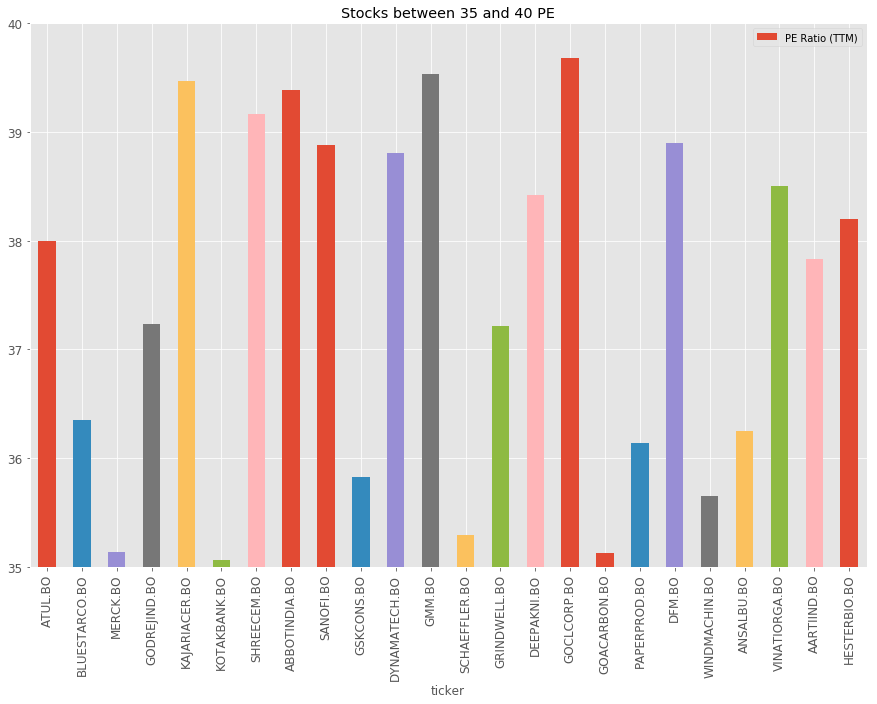

In [61]:
# Getting the required PE values

req_pe = pe_data[(pe_data >= 35) & (pe_data <= 40)]
print(req_pe)

plot = req_pe.plot(kind='bar',title ="Stocks between 35 and 40 PE",figsize=(15,10),legend=True, fontsize=12).axis([None,None,35,40])

In [62]:
# Saving our output

req_pe.to_csv('output/required-pe.csv')